In [2]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
model = models.mobilenet_v2(pretrained=True)
time1 = time.time()
print(model)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /home/austinguish/.cache/torch/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:01<00:00, 9.43MB/s]


MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [3]:
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Dropout(0.2),nn.Linear(1280,6))
model

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

transfer_mobilenet_ADAM
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.1833, Accuracy: 59.0498%,Valid: Loss: 0.7940, Accuracy: 75.3049%,Time: 5.8203s
Epoch: 2
Epoch: 002, Training: Loss: 0.6707, Accuracy: 78.7330%,Valid: Loss: 0.6335, Accuracy: 80.1829%,Time: 5.9469s
Epoch: 3
Epoch: 003, Training: Loss: 0.5459, Accuracy: 82.7489%,Valid: Loss: 0.5541, Accuracy: 79.8780%,Time: 5.7001s
Epoch: 4
Epoch: 004, Training: Loss: 0.4637, Accuracy: 85.8597%,Valid: Loss: 0.4946, Accuracy: 83.8415%,Time: 6.3579s
Epoch: 5
Epoch: 005, Training: Loss: 0.4171, Accuracy: 87.3303%,Valid: Loss: 0.4694, Accuracy: 83.5366%,Time: 6.4256s
Epoch: 6
Epoch: 006, Training: Loss: 0.3683, Accuracy: 89.0271%,Valid: Loss: 0.4700, Accuracy: 82.9268%,Time: 5.6682s
Epoch: 7
Epoch: 007, Training: Loss: 0.3363, Accuracy: 89.9887%,Valid: Loss: 0.4242, Accuracy: 85.9756%,Time: 5.5865s
Epoch: 8
Epoch: 008, Training: Loss: 0.3175, Accuracy: 90.8371%,Valid: Loss: 0.4549, Accuracy: 84.1463%,Time: 5.7436s
Epoch: 9
Epoch: 009, Tr

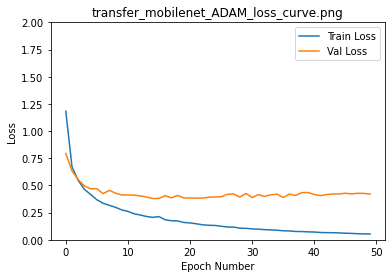

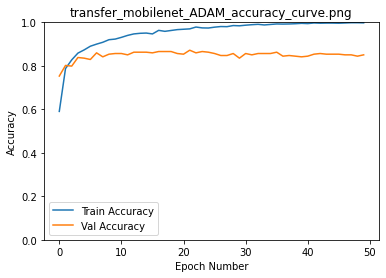

608.3612439632416


In [4]:
device = 7
model_name_list = ["transfer_mobilenet"]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
file_name = model_name_list[0]+'_'+"ADAM"
print(file_name)
optimizer = optim.Adam(model.parameters())
trainmodel(model_name=model,loss = lossfunc,batchsize=36,opti=optimizer,\
           epoch_num=50,device_num=device,filename=file_name)
time2 = time.time()
print(time2-time1)